In [1009]:
import ast

class NonTerminalNodeVisitor(ast.NodeVisitor):
    def __init__(self):
        self.non_terminal_nodes = []

    def visit(self, node):
        # Check if the node has any child nodes (i.e., it's a non-terminal node)
        if any(isinstance(child, ast.AST) for child in ast.iter_child_nodes(node)):
            self.non_terminal_nodes.append(node)
        # Continue visiting the child nodes
        self.generic_visit(node)

In [1010]:
from fuzzingbook.Grammars import simple_grammar_fuzzer, EXPR_GRAMMAR
x = (simple_grammar_fuzzer(grammar=EXPR_GRAMMAR, max_nonterminals=4))
seed = f"""
a=+1
print(a)
"""
tree = ast.parse(seed)

In [1011]:
interestingNodes = ["BinOp", "UnaryOp", "Constant"]

In [1012]:
from bookutils import show_ast


a=+1
print(a)



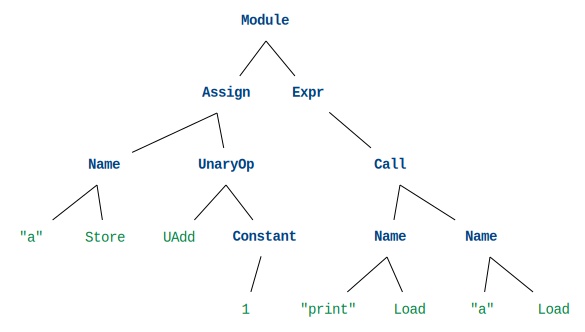

In [1013]:
print(seed)
show_ast(tree)

In [1014]:
def returnNodes(tree):
    return [node for node in ast.walk(tree) if isinstance(node, (ast.BinaryOp ,ast.UnaryOp))]

# visitor = NonTerminalNodeVisitor()
# visitor.visit(tree)

In [1015]:
nodes = returnNodes(tree)
# nodes = visitor.non_terminal_nodes

In [1016]:
for node in nodes:
    print(ast.dump(node))


UnaryOp(op=UAdd(), operand=Constant(value=1))


In [1017]:
import random

In [1018]:
nodeToBeMutated = random.choice(nodes)

In [1019]:
# BinOp mutations
class PyMutator(ast.NodeTransformer):
    def visit_BinaryOp(self, node):
        if(isinstance(node.op, (ast.Add, ast.Mult))):
            node.left, node.right = node.right, node.left
        else:
            x = random.choice([0,1])
            if x:
                node.left = ast.BinOp(left=node.left, op=ast.Mult(), right=ast.Constant(value=1))
                node.right = ast.BinOp(left=node.right, op=ast.Div(), right=ast.Constant(value=1))
            else:
                node.left = ast.BinOp(left=node.left, op=ast.Div(), right=ast.Constant(value=1))
                node.right = ast.BinOp(left=node.right, op=ast.Mult(), right=ast.Constant(value=1))

        return node

    

In [1020]:
class PyMutator(PyMutator):
    # UnaryOp muations
    def visit_UnaryOp(self, node):
        plus = random.randint(1,5)
        minus=1
        if(isinstance(node.op, ast.UAdd)):
            while(minus%2 != 0):
                minus = random.randint(1,5)
        else:
            while(minus%2 == 0):
                minus = random.randint(1,5)

        p = plus
        m = minus

        for _ in range(plus+minus):
            x = random.choice([0,1])
            if x and p:
                node = ast.UnaryOp(op=ast.UAdd(), operand=node)
                p-=1
            elif m:
                node = ast.UnaryOp(op=ast.USub(), operand=node)
                m-=1
        return node

In [1021]:
print(ast.unparse(PyMutator().visit(tree)))

a = -+-++1
print(a)


In [1022]:
# Constant mutations
if(isinstance(node, ast.Constant)):
    pass

In [1023]:
# For mutations
if(isinstance(node, ast.For)):
    pass

In [1024]:
# Assign mutations
if(isinstance(node, ast.Assign)):
    pass

In [1025]:
# If mutations
if(isinstance(node, ast.If)):
    pass

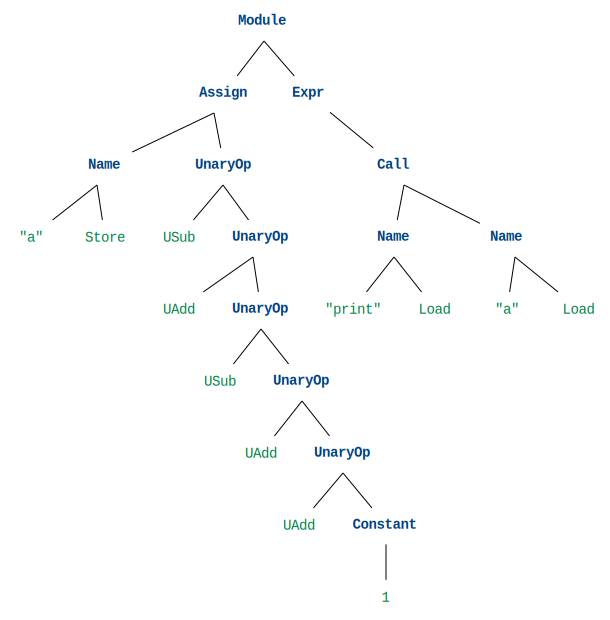

In [1026]:
show_ast(tree)

In [1027]:
print(ast.unparse(tree))

a = -+-++1
print(a)


In [1028]:
exec(ast.unparse(tree)) == exec(seed)

1
1


True